In [17]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

from numpy import arange
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# dataset indonesia (jakarta)
case = pd.read_csv('data/new/case_maret_july.csv')
mobility = pd.read_csv('data/new/mobility_maret_july.csv')
weather = pd.read_csv('data/new/weather_maret_july.csv')
case.set_index('date', inplace=True)
#weather.set_index('date', inplace=True)
mobility.set_index('date', inplace=True)

In [3]:
new_weather = weather.interpolate(method='spline', order=2)
new_weather.head()

new_weather.set_index('date', inplace=True)

In [4]:
# Differencing order = 1
mobility_diff = mobility.diff(periods=1)
mobility_diff = mobility_diff.iloc[1:]

case_diff = case.diff(periods=1)
case_diff = case_diff.iloc[1:]

new_weather = new_weather.iloc[1:]
mobility_diff.head()

,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
date,,,,,,
2020-03-19,-6.0,-9.0,-5.0,-6.0,-2.0,1.0
2020-03-20,-2.0,1.0,1.0,-4.0,-2.0,3.0
2020-03-21,-5.0,6.0,-6.0,2.0,13.0,-4.0
2020-03-22,-14.0,-17.0,-21.0,-9.0,-2.0,3.0
2020-03-23,9.0,3.0,16.0,-4.0,-22.0,4.0


In [5]:
data = pd.concat([case_diff, new_weather, mobility_diff], axis=1)
data.head()

,case,rh,avt,mxt,mnt,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
date,,,,,,,,,,,
2020-03-19,12.0,83.0,28.1,31.4,25.800000,-6.0,-9.0,-5.0,-6.0,-2.0,1.0
2020-03-20,-36.0,82.0,27.4,31.2,25.200000,-2.0,1.0,1.0,-4.0,-2.0,3.0
2020-03-21,30.0,81.0,28.1,32.4,26.521978,-5.0,6.0,-6.0,2.0,13.0,-4.0
2020-03-22,-8.0,84.0,27.2,31.2,25.000000,-14.0,-17.0,-21.0,-9.0,-2.0,3.0
2020-03-23,15.0,81.0,28.2,31.8,25.000000,9.0,3.0,16.0,-4.0,-22.0,4.0


In [6]:
data.shape

(422, 11)

In [7]:
train = data[:412]
test = data[412:]

In [8]:
X = train[['rh', 'avt', 'mxt', 'mnt', 'retail_recreation', 'grocery_pahrmacy', 'parks', 'transit_station', 'workplace', 'residential']]
y = train['case']

In [9]:
case_true = test['case']
del test['case']

In [10]:
# Create the SVR regressor
model = SVR(kernel='linear')

# defiinisikan evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = dict()
grid['epsilon'] = arange(0, 1, 0.01)

search = GridSearchCV(model, grid, scoring='neg_root_mean_squared_error')
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -282.847
Config: {'epsilon': 0.0}


In [11]:
# Create the SVR regressor
model = SVR(kernel='linear',epsilon=0)
model = model.fit(X,y)
# Generate predictions for testing data
y_pred = model.predict(test)

In [12]:
y_pred

array([  4.17352381, -12.84848378, -15.74469556,   9.84815425,
       -30.37166682,  34.70285886,  22.32429351,  28.78873666,
        94.22813058, -22.17953711])

In [13]:
list_hasil = y_pred.tolist()
list_eval = case_true.tolist()

In [14]:
rmse = mean_squared_error(list_eval, list_hasil, squared=False)
rmse

199.56838713512556

In [15]:
mse = mean_squared_error(list_eval, list_hasil)
mse

39827.54114371535

In [16]:
mae = mean_absolute_error(list_eval, list_hasil)
mae

161.89808335116405

<AxesSubplot:>

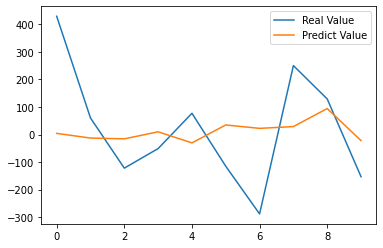

In [34]:
compare = pd.DataFrame(list(zip(list_eval, list_hasil)), columns =['Real Value', 'Predict Value'])
compare.plot()